In [1]:
%matplotlib inline

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Perlin Noise

## Level 0

Perlin noise is a way to generate pictures or terrain:

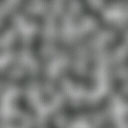

## Level 1

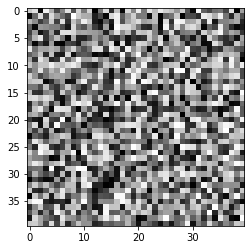

In [77]:
img = np.random.uniform(0, 1, (40,40))
plt.imshow(img, cmap="gray")

In [78]:
gradients = {}
def get_gradient_vector(x, y):
    if (x, y) not in gradients:
        theta = np.random.uniform(0, 2 * np.pi)
        gradients[(x, y)] = (np.cos(theta), np.sin(theta))
    return gradients[(x, y)]

In [79]:
def lerp(t, a, b):
    return a + t * (b - a)

In [80]:
def perlin(x: float, y: float) -> float:
    '''
    Caluclates the perlin noise at point (x, y).
    '''  
    # Local coordinates of the (x,y) point (=with respect to the unit square bottom left edge)
    x0 = x % 1
    y0 = y % 1
        
    # Generate distance vectors
    d1 = np.array([x0, y0])                # bottom left
    d2 = np.array([x0 - 1, y0])            # bottom right
    d3 = np.array([x0, y0 - 1])            # top left
    d4 = np.array([x0 - 1, y0 - 1])        # top right
    
    # Coordinates of the bottom-left edge of the unit square with respect to the origin
    x_int = int(x)
    y_int = int(y)
    
    # Generate gradient vectors
    g1 = get_gradient_vector(x_int, y_int)             # bottom left
    g2 = get_gradient_vector(x_int + 1, y_int)         # bottom right
    g3 = get_gradient_vector(x_int, y_int + 1)         # top left
    g4 = get_gradient_vector(x_int + 1, y_int + 1)     # top right
    
    # Calculate the influence factors
    f1 = d1 @ g1     # bottom left
    f2 = d2 @ g2     # bottom right
    f3 = d3 @ g3     # top left
    f4 = d4 @ g4     # top right
    
    # Calculate the noise
    bottom_interpolation = lerp(x0, f1, f2)
    top_interpolation = lerp(x0, f3, f4)
    noise = lerp(y0, bottom_interpolation, top_interpolation)

    return noise

In [81]:
def plot_img(img):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
    ax = plt.gca()
    ax.invert_yaxis()
    plt.show()

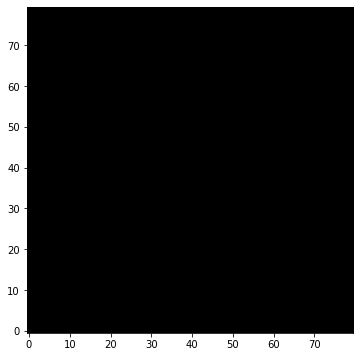

In [82]:
# Generate image array
size = 80
img = np.zeros((size, size))
for x in np.arange(size):
    for y in np.arange(size):
        noise = perlin(x, y)
        img[x, y] = noise * 255
        
# Plot
plot_img(img)

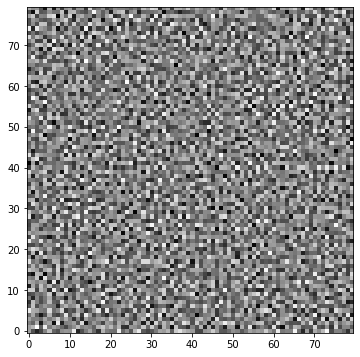

In [83]:
# Generate image array
size = 80
img = np.zeros((size, size))
for x in np.arange(size):
    for y in np.arange(size):
        noise = perlin(x + 0.1, y + 0.1)
        img[x, y] = noise * 255
        
# Plot
plot_img(img)

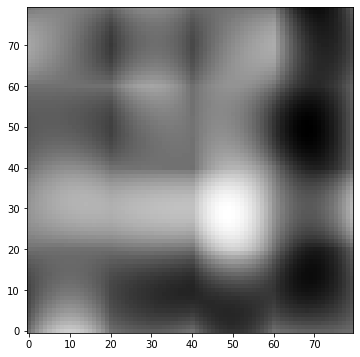

In [84]:
# Generate image array
size = 80
img = np.zeros((size, size))
for x in np.arange(size):
    for y in np.arange(size):
        noise = perlin(x * 0.05, y * 0.05)
        img[x, y] = noise * 255
        
# Plot
plot_img(img)

In [85]:
def fade_squared(n):
    return n*2

def perlin(x: float, y: float, fade_func) -> float:
    '''
    Caluclates the perlin noise at point (x, y).
    '''  
    # Local coordinates of the (x,y) point (=with respect to the unit square bottom left edge)
    x0 = x % 1
    y0 = y % 1
        
    # Generate distance vectors
    d1 = np.array([x0, y0])                # bottom left
    d2 = np.array([x0 - 1, y0])            # bottom right
    d3 = np.array([x0, y0 - 1])            # top left
    d4 = np.array([x0 - 1, y0 - 1])        # top right
    
    # Coordinates of the bottom-left edge of the unit square with respect to the origin
    x_int = int(x)
    y_int = int(y)
    
    # Generate gradient vectors
    g1 = get_gradient_vector(x_int, y_int)             # bottom left
    g2 = get_gradient_vector(x_int + 1, y_int)         # bottom right
    g3 = get_gradient_vector(x_int, y_int + 1)         # top left
    g4 = get_gradient_vector(x_int + 1, y_int + 1)     # top right
    
    # Calculate the influence factors
    f1 = d1 @ g1     # bottom left
    f2 = d2 @ g2     # bottom right
    f3 = d3 @ g3     # top left
    f4 = d4 @ g4     # top right
    
    # Calculate the noise
    # Fade the coordinates
    x0 = fade_func(x0)
    y0 = fade_func(y0)
    # Interpolate the influence factors
    bottom_interpolation = lerp(x0, f1, f2)
    top_interpolation = lerp(x0, f3, f4)
    noise = lerp(y0, bottom_interpolation, top_interpolation)

    return noise

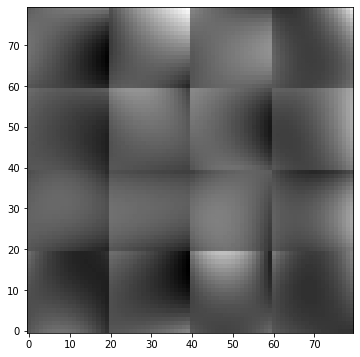

In [86]:
# Generate image array
size = 80
img = np.zeros((size, size))
for x in np.arange(size):
    for y in np.arange(size):
        noise = perlin(x * 0.05, y * 0.05, fade_squared)
        img[x, y] = noise * 255
        
# Plot
plot_img(img)

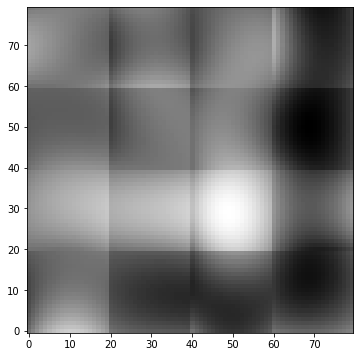

In [87]:
def fade_sin(n):
    return np.sin(n)

# Generate image array
size = 80
img = np.zeros((size, size))
for x in np.arange(size):
    for y in np.arange(size):
        noise = perlin(x * 0.05, y * 0.05, fade_sin)
        img[x, y] = noise * 255
        
# Plot
plot_img(img)

In [88]:
def fade(n):
    return ((6 * n - 15) * n + 10)*n*n*n

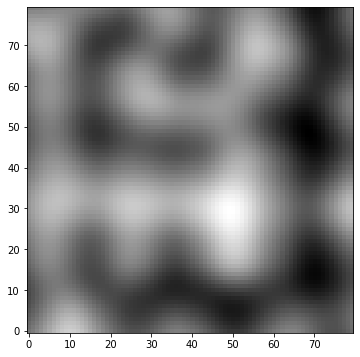

In [89]:
# Generate image array
size = 80
img = np.zeros((size, size))
for x in np.arange(size):
    for y in np.arange(size):
        noise = perlin(x * 0.05, y * 0.05, fade)
        img[x, y] = noise * 255
        
# Plot
plot_img(img)

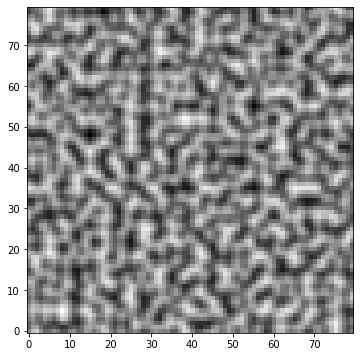

In [90]:

# Generate image array
size = 80
img = np.zeros((size, size))
for x in np.arange(size):
    for y in np.arange(size):
        noise = perlin(x * 0.3, y * 0.3, fade)
        img[x, y] = noise * 255
        
# Plot
plot_img(img)

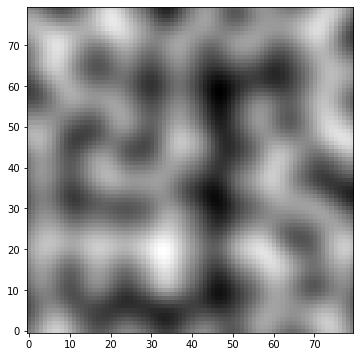

In [91]:
# Generate image array
size = 80
img = np.zeros((size, size))
for x in np.arange(size):
    for y in np.arange(size):
        a = 1
        f = 0.3
        for _ in range(3):
            noise = a * perlin(x * f, y * f, fade)
            img[x, y] = noise * 255
            a *= 0.5
            f /= 2
        
# Plot
plot_img(img)

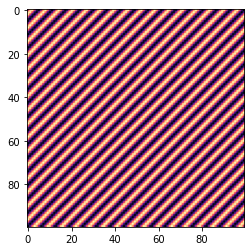

In [68]:
def calculate_random_noise(x, y):
    return np.random.uniform(0, 1)

def calculate_sin_noise(x, y):
    return np.sin(x + y)

size = 100
img = np.zeros((size, size))    
for x in np.arange(size):
    for y in np.arange(size):
        noise = calculate_sin_noise(x, y)
        img[x, y] = noise * 255
plt.imshow(img, cmap='magma')
plt.show()

In [3]:
def get_gradient_vector(hash_value):
    if hash_value % 4 == 0:
        grad_v = np.array([-1, -1])
    elif hash_value % 4 == 1:
        grad_v = np.array([1, -1])
    elif hash_value % 4 == 2:
        grad_v = np.array([-1, 1])
    elif hash_value % 4 == 3:
        grad_v = np.array([1, 1])
    
    return grad_v

def fade(t):
    return ((6 * t - 15) * t + 10)*t*t*t

def lerp(t, a, b):
    return a + t * (b - a)

In [12]:
def perlin(x: float, y: float) -> float:
    '''
    Caluclates the perlin noise at point (x, y).
    '''
    
    p = np.repeat(np.arange(256), 2)
    np.random.shuffle(p)
    
    # Local coordinates of the (x,y) point (=with respect to the unit square bottom left edge)
    x0 = x % 1
    y0 = y % 1
        
    # Generate distance vectors
    d1 = np.array([x0, y0])                # bottom left
    d2 = np.array([x0 - 1, y0])            # bottom right
    d3 = np.array([x0, y0 - 1])            # top left
    d4 = np.array([x0 - 1, y0 - 1])        # top right
    
    # Coordinates of the bottom-left edge of the unit square with respect to the origin
    xi = int(x) % 256
    yi = int(y) % 256
    
    # Generate gradient vectors
    # Calculate hash values
    h1 = p[p[xi] + yi]                     # bottom left
    h2 = p[p[xi + 1] + yi]                 # bottom right
    h3 = p[p[xi] + yi + 1]                 # top left
    h4 = p[p[xi + 1] + yi + 1]             # top right
    # Get gradient vectors
    g1 = get_gradient_vector(h1)      # bottom left
    g2 = get_gradient_vector(h2)      # bottom right
    g3 = get_gradient_vector(h3)      # top left
    g4 = get_gradient_vector(h4)      # top right
    
    # Calculate the influence factors
    f1 = d1 @ g1     # bottom left
    f2 = d2 @ g2     # bottom right
    f3 = d3 @ g3     # top left
    f4 = d4 @ g4     # top right
    
    # Calculate the noise
    # Fade the coordinates
    x0 = fade(x0)
    y0 = fade(y0)
    # Interpolate the influence factors
    bottom_interpolation = lerp(x0, f1, f2)
    top_interpolation = lerp(x0, f3, f4)
    noise = lerp(y0, bottom_interpolation, top_interpolation)

    return noise

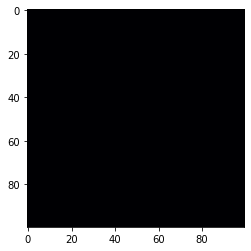

In [66]:
size = 100
img = np.zeros((size, size))    
for x in np.arange(size):
    for y in np.arange(size):
        n = 0
        a = 1
        f = 1
        for o in range(2):
            v = a * calc_perlin_noise(x * f, y * f)
            n += v
            a *= 0.5
            # f *= 2
        img[x, y] = n * 255

plt.imshow(img, cmap='magma')
plt.show()

## 1D Space

Draw points on the x-axis and plot a line with random slope.

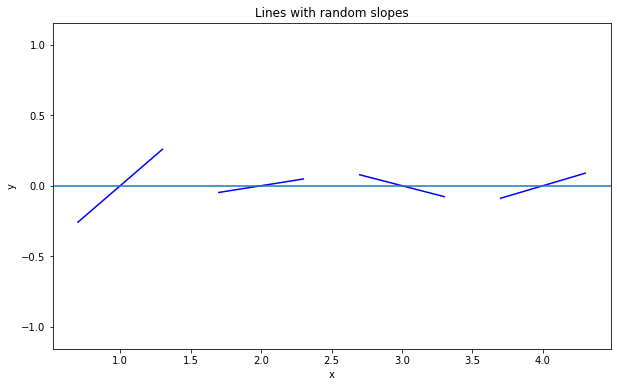

In [8]:
num_points = 4
points = np.arange(1, num_points + 1)
slopes = np.random.uniform(-1, 1, 4)

def draw_lines(points, slopes):
    for index, xi in enumerate(points):
        x = np.array([-0.3, 0.3]) + xi
        y = slopes[index] * (x - xi)
        plt.plot(x, y, 'b')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0)
    plt.axis('equal')
    
plt.figure(figsize=(10,6))
draw_lines(points, slopes)
plt.title('Lines with random slopes')
plt.show()

Add a second plotting function to plot the line extensions as stem-type plot.

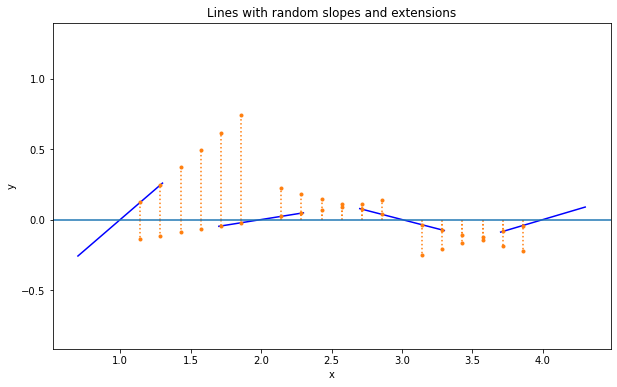

In [9]:
def draw_stems(points, slopes, divisions):
    for index, xi in enumerate(points[:-1]):
        x = np.linspace(xi, xi + 1, divisions)[1:-1]
        y1 = slopes[index] * (x - xi)
        y2 = slopes[index + 1] * (x - xi - 1)
        plt.stem(x, y1, basefmt=' ', linefmt='C1:', markerfmt='C1.')
        plt.stem(x, y2, basefmt=' ', linefmt='C1:', markerfmt='C1.')
    plt.axis('equal')

plt.figure(figsize=(10,6))
draw_lines(points, slopes)
draw_stems(points, slopes, divisions=8)
plt.title('Lines with random slopes and extensions')
plt.show()

Define linear interpolation function (abreviated as lerp; don't know reason). Also add a third plot function to plot interpolations.

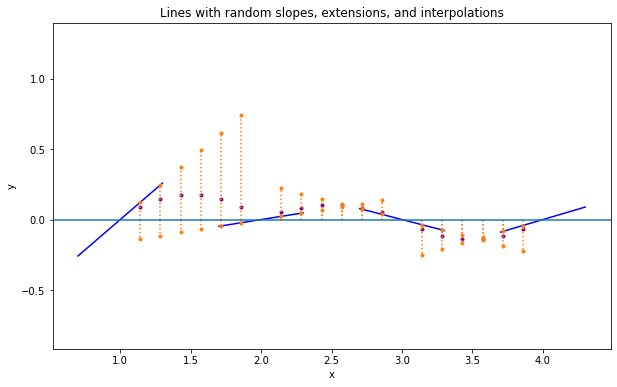

In [10]:
def lerp(a,b,t):
    """
    Linear Interpolation between two points.
    a - starting position
    b - the other position
    t - percentage of the distance between a and b
    """
    return a + (b - a) * t


def draw_interpolation(points, slopes, divisions):
    for index, xi in enumerate(points[:-1]):
        x = np.linspace(xi, xi + 1, divisions)[1:-1]
        y1 = slopes[index] * (x - xi)
        y2 = slopes[index + 1] * (x - xi - 1)
       
        t = x - xi
        y_interpolated = np.vectorize(lerp)(y1, y2, t)
        plt.scatter(x, y_interpolated, marker='.', c='purple')

plt.figure(figsize=(10,6))
draw_lines(points, slopes)
draw_stems(points, slopes, divisions=8)
draw_interpolation(points, slopes, 8)

plt.title('Lines with random slopes, extensions, and interpolations')
plt.show()

Bias t with the smoothstep function (let's call it f) before lin interpolation. E.g. at t = 1/2, f(t) = 1/2. However, near the ends: t=0.9, f(t) = 0.972.

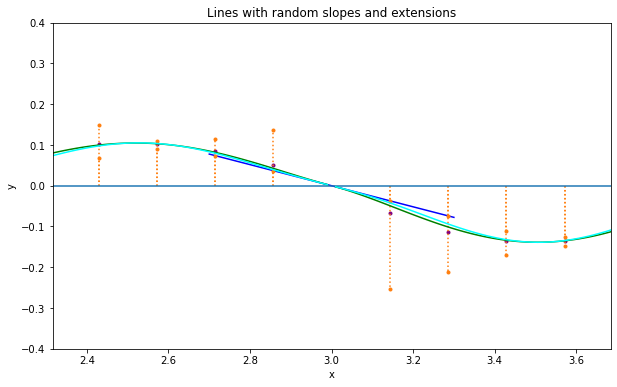

In [11]:
def draw_smooth_interpolation(points, slopes, divisions, smooth_func, color='blue'):
    for index, xi in enumerate(points[:-1]):
        x = np.linspace(xi, xi + 1, divisions)[1:-1]
        y1 = slopes[index] * (x - xi)
        y2 = slopes[index + 1] * (x - xi - 1)
        
        t = smooth_func(x - xi)
        y_interpolated = np.vectorize(lerp)(y1, y2, t)
        plt.plot(x, y_interpolated, c=color)


plt.figure(figsize=(10,6))
draw_lines(points, slopes)
draw_stems(points, slopes, divisions=8)
draw_interpolation(points, slopes, 8)

# Standard smoothstep function
smoothstep_function = np.vectorize(lambda x: -2 * x ** 3 + 3 * x ** 2)
draw_smooth_interpolation(points, slopes, 100, smoothstep_function, 'green')

# Improved smoothstep function
smoothstep_function = np.vectorize(lambda x: 6 * x ** 5 - 15 * x ** 4 + 10 * x ** 3)
draw_smooth_interpolation(points, slopes, 100, smoothstep_function, 'cyan')

plt.title('Lines with random slopes and extensions')
plt.xlim(2.7, 3.3)
plt.ylim(-0.4, 0.4)
plt.show()

TODO: write code to plot octaves.

## 2D Space

Helper function to plot vectors in 2d space.

In [12]:
def plot_vectors(vectors):
    """
    Plots vectors on the xy-plane. The `vectors` parameter is a Python list.
    Each vector is specified in the format [start_x, start_y, end_x, end_y]
    """

    # Calculate the absolute end points
    start_x, start_y, end_x, end_y = np.array(vectors).T
    end_x = end_x - start_x
    end_y = end_y - start_y
    
    # Plot an arrow for each vector
    plt.quiver(start_x, start_y, end_x, end_y, scale=1, scale_units='xy', angles = "xy")
    
    # Make the plot pretty
    all_x = np.concatenate((start_x, end_x))
    all_y = np.concatenate((start_y, end_y))
    min_x, max_x = min(all_x), max(all_x)
    min_y, max_y = min(all_y), max(all_y)
    correction = 1
    plt.xlim(min_x - correction, max_x + correction)
    plt.ylim(min_y - correction, max_y + correction)
    ax = plt.gca()
    ax.set_aspect('equal')
    plt.grid()
    
    # Move the origin to (0,0)
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Unit Test
# plot_vectors([[0, 0, 1, 0], [0, 0, 0, 1]], ["red", "blue"]) # Two orthogonal vectors

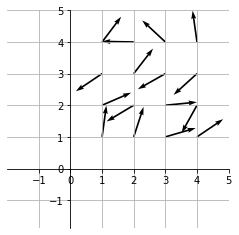

In [13]:
def generate_vector(start_x, start_y, r=1, theta=0):
    end_x = start_x + np.cos(theta) * r
    end_y = start_y + np.sin(theta) * r
    return [start_x, start_y, end_x, end_y]


vectors = [generate_vector(i, j, theta=np.random.uniform(0, 2 * np.pi)) for i in range(1, 5) for j in range(1, 5)]
plot_vectors(vectors)

plt.show()

## References

* https://eev.ee/blog/2016/05/29/perlin-noise/
* https://rtouti.github.io/graphics/perlin-noise-algorithm
* [link]()
* [link]()
* [link]()
* [link]()
* [link]()